In [5]:
import pandas as pd
import numpy as np
import os,sys
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-profit-customers-profile/data/raw/train_df.csv')
df.sample(5)

,id,purchase_amount,asset_amount,average_ratio,personal_id_1,personal_id_2,age,area,job_type,phone,personal_card_1,personal_card_2,personal_card_3,personal_card_4,car,purchase_score,campaign_use,card_expired,average_favorite_score,card_history_period,score_1,score_2,score_3,score_4,total_amount_1,total_amount_2,total_amount_3,important_customer
4624,4624,76154.0,68601,85.079157,2826,51,33,NaN,Self employed,1,1,NaN,0,0.0,0,384,1.0,NaN,3.125937,5.509392,0,6,3,0.0,227888,208615,7906,0
1852,1852,51645.0,147699,74.275383,1891,45,45,2366.0,Salaried,1,1,1.0,0,0.0,0,631,0.0,0.0,0.513164,1.971091,0,1,5,0.0,7182,3583,457,0
9957,9957,38945.0,69488,74.768314,801,86,40,5222.0,Salaried,1,1,0.0,0,0.0,0,299,0.0,0.0,0.004217,0.109177,0,0,0,0.0,213420,5057,2191,0
13434,13434,46952.0,75206,82.771864,93,51,45,3353.0,Self employed,1,1,0.0,0,0.0,0,727,0.0,0.0,1.007148,1.270777,0,1,2,0.0,43790,10859,686,0
9729,9729,30014.0,64086,82.794658,300,51,48,1668.0,Self employed,1,1,0.0,0,0.0,0,759,0.0,0.0,1.239933,2.284713,0,2,0,0.0,3927,5903,927,0


In [6]:
df.drop(['id'],axis=1,inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Univariate Analysis

<Axes: ylabel='proportion'>

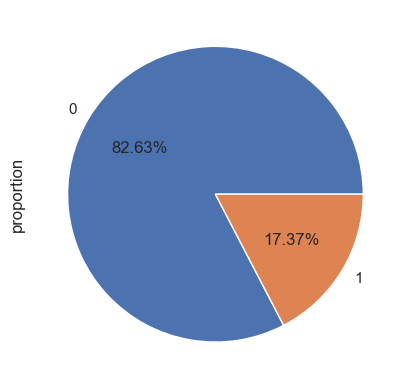

In [7]:
df['important_customer'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='job_type', ylabel='count'>

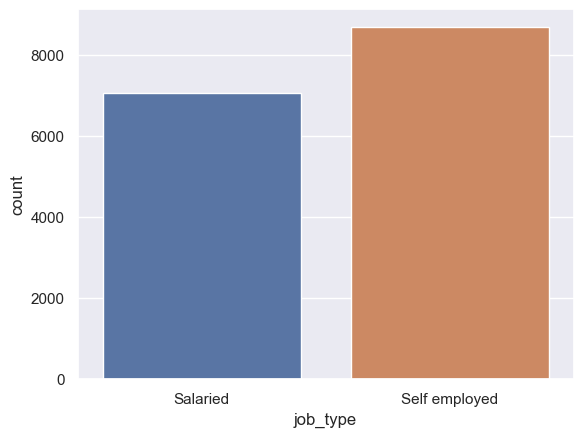

In [8]:
sns.countplot(x = 'job_type', data = df)

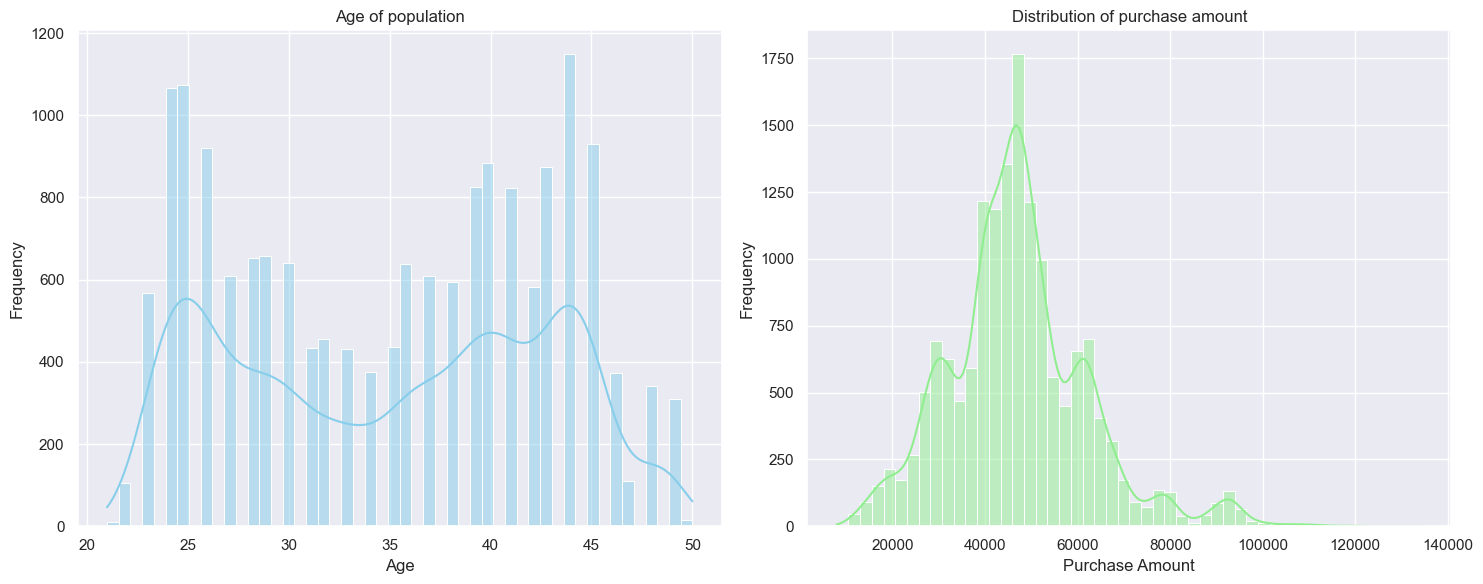

In [9]:
plt.figure(figsize=(15, 6))

# Distribution plot for age
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=50, color='skyblue')
plt.title('Age of population')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution plot for purchase amount
plt.subplot(1, 2, 2)
sns.histplot(df['purchase_amount'], kde=True, bins=50, color='lightgreen')
plt.title('Distribution of purchase amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

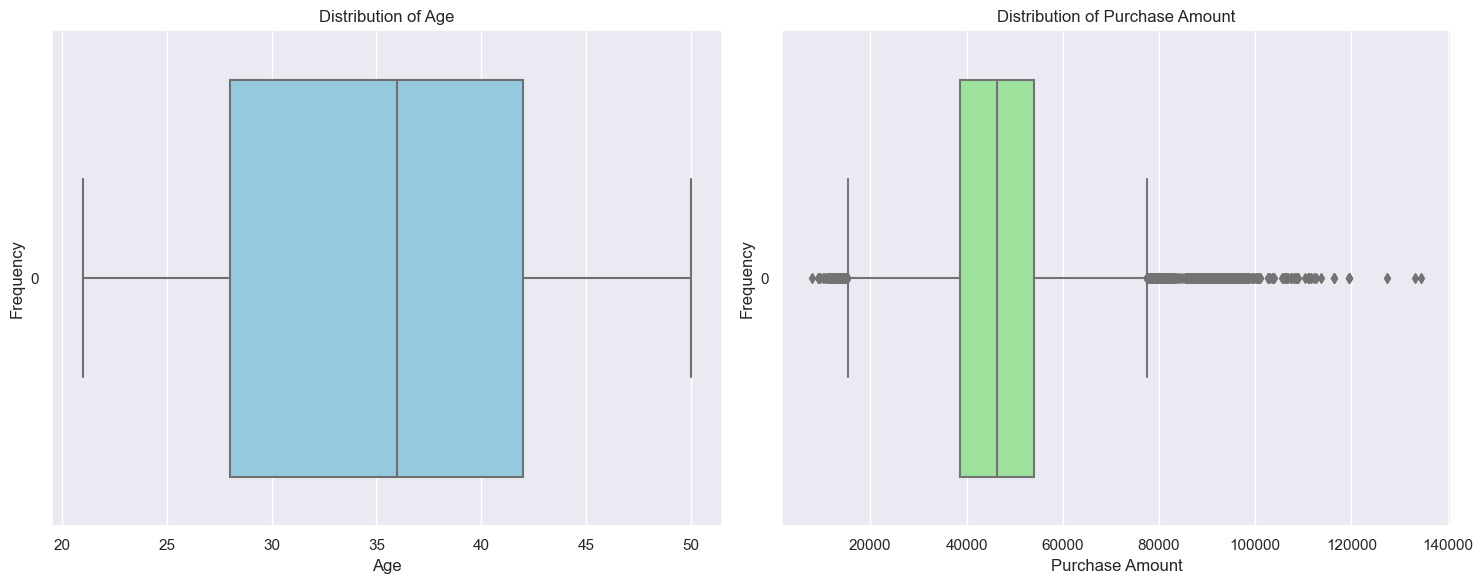

In [10]:
plt.figure(figsize=(15, 6))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(df['age'], color='skyblue',orient='h')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution plot for purchase amount
plt.subplot(1, 2, 2)
sns.boxplot(df['purchase_amount'], color='lightgreen',orient='h')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: xlabel='important_customer', ylabel='purchase_amount'>

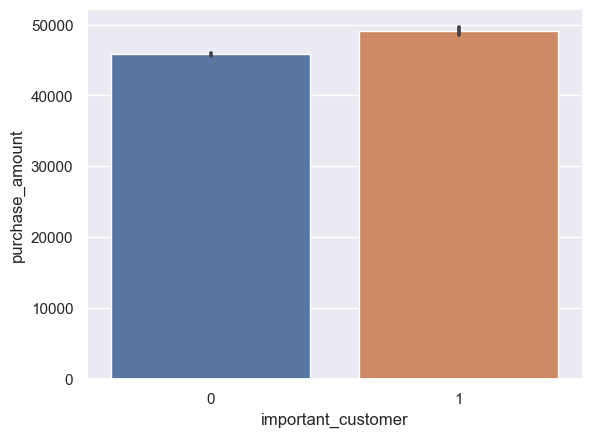

In [11]:
sns.barplot(x=df['important_customer'], y=df['purchase_amount'], estimator='median')

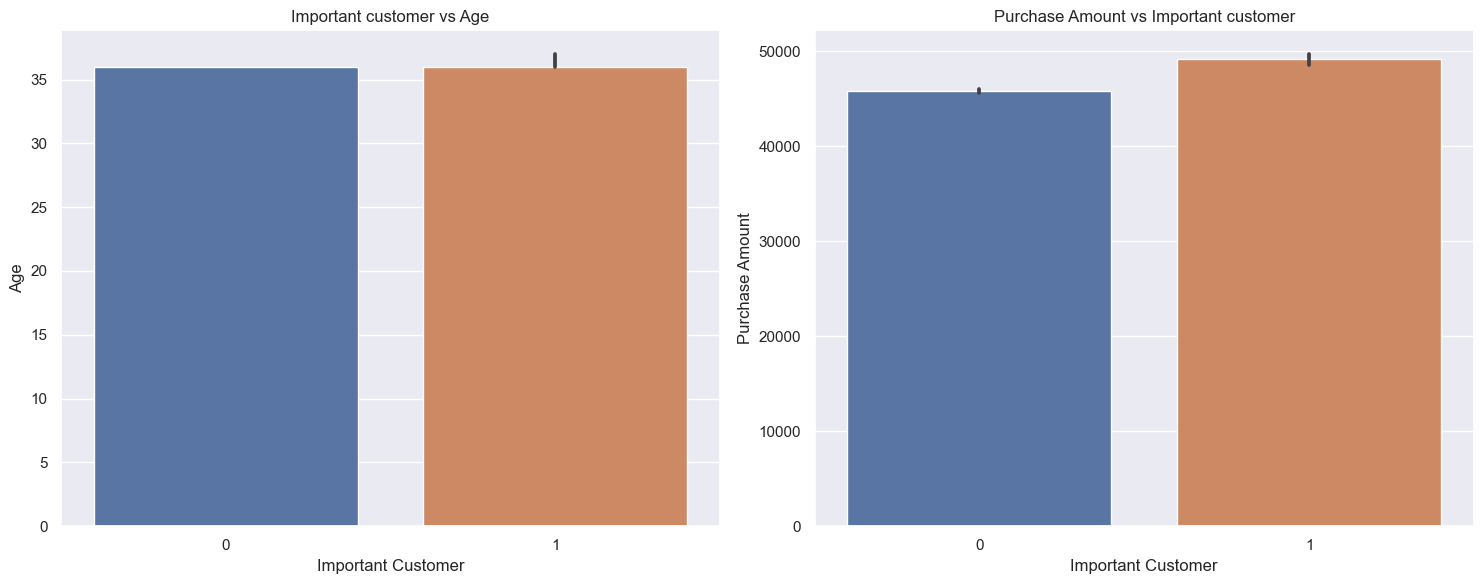

In [12]:
plt.figure(figsize=(15, 6))

# Important customer vs Age
plt.subplot(1, 2, 1)
sns.barplot(x=df['important_customer'], y=df['age'], estimator='median')
plt.title('Important customer vs Age')
plt.xlabel('Important Customer')
plt.ylabel('Age')

# Purchase Amount vs Important customer
plt.subplot(1, 2, 2)
sns.barplot(x=df['important_customer'], y=df['purchase_amount'], estimator='median')
plt.title('Purchase Amount vs Important customer')
plt.xlabel('Important Customer')
plt.ylabel('Purchase Amount')

plt.tight_layout()
plt.show()

<Axes: xlabel='campaign_use', ylabel='important_customer'>

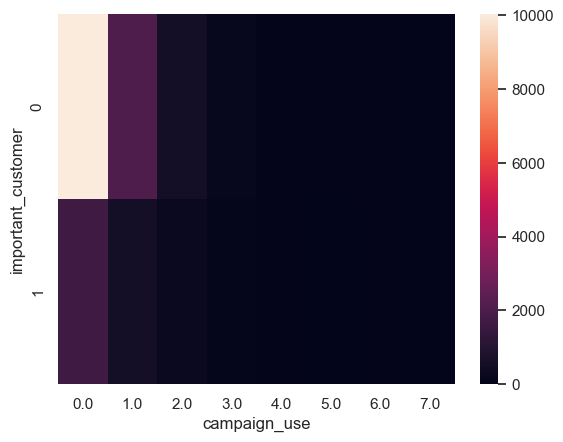

In [13]:
sns.heatmap(pd.crosstab(df['important_customer'],df['campaign_use']))

<Axes: xlabel='campaign_use', ylabel='important_customer'>

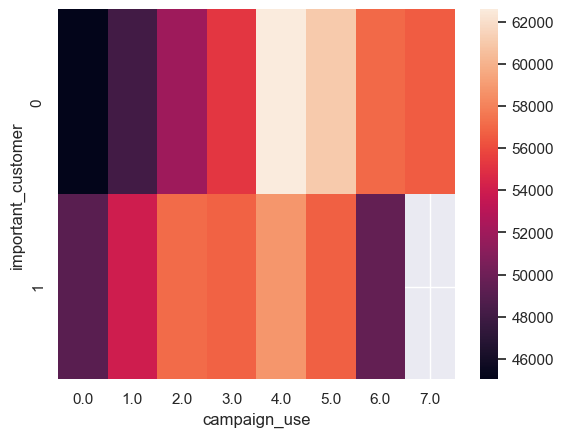

In [14]:
sns.heatmap(np.round(pd.pivot_table(df, index = 'important_customer', columns = 'campaign_use', values = 'purchase_amount',
                          aggfunc = 'mean'),2),fmt='.2f')

<Axes: xlabel='job_type', ylabel='important_customer'>

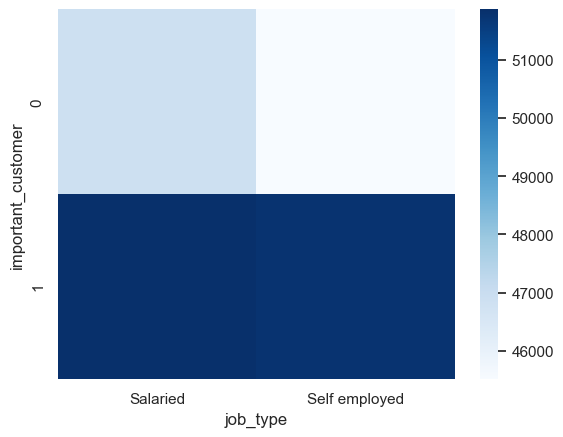

In [15]:
sns.heatmap(np.round(pd.pivot_table(df, index = 'important_customer', columns = 'job_type', values = 'purchase_amount',
                          aggfunc = 'mean'),2),fmt='.2f',cmap='Blues')

In [16]:
np.round(pd.pivot_table(df, index = 'important_customer', columns = 'job_type', values = 'purchase_amount',
                          aggfunc = 'mean'),2)

job_type,Salaried,Self employed
important_customer,,
0,46856.63,45513.51
1,51874.15,51792.39


<Axes: xlabel='card_history_period', ylabel='purchase_amount'>

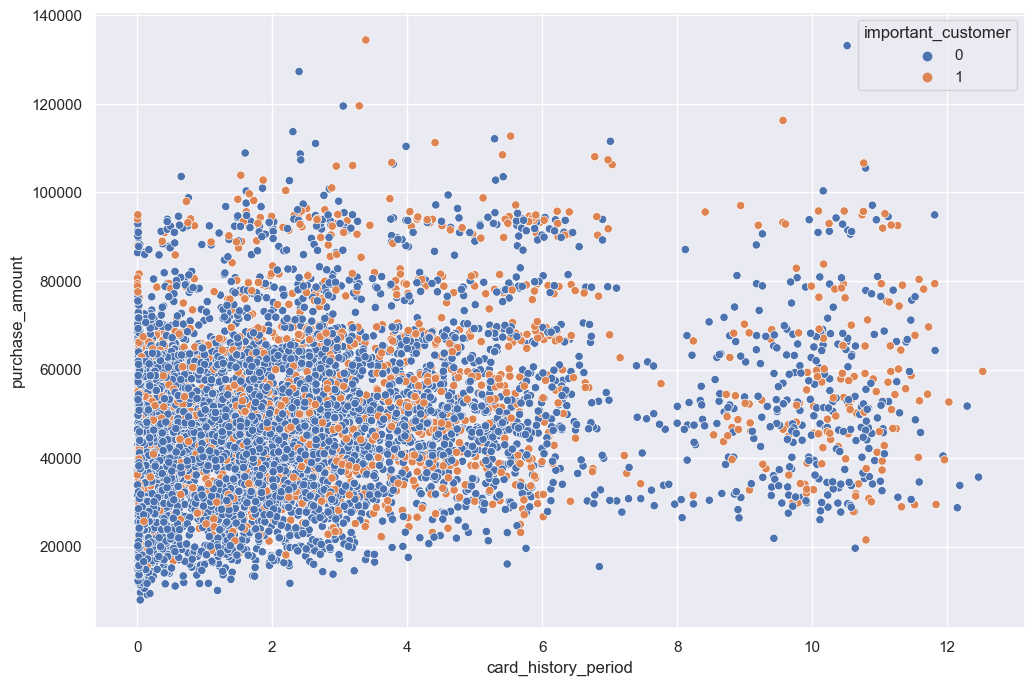

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['card_history_period'], y = df['purchase_amount'],hue=df['important_customer'])

In [18]:
## Checking Outliers and distribution of numerical values

df_num = [i for i in df.columns if df[i].dtype != 'object' and i!='phone']

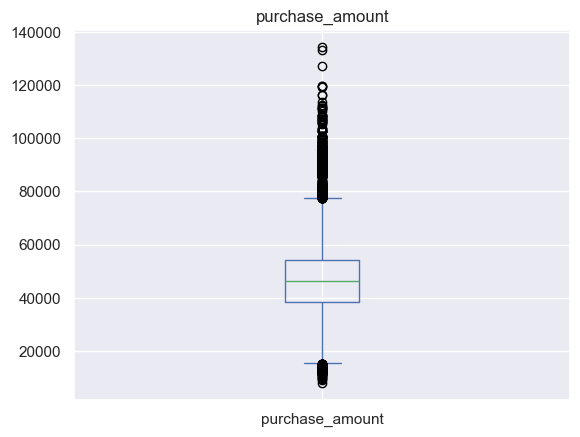

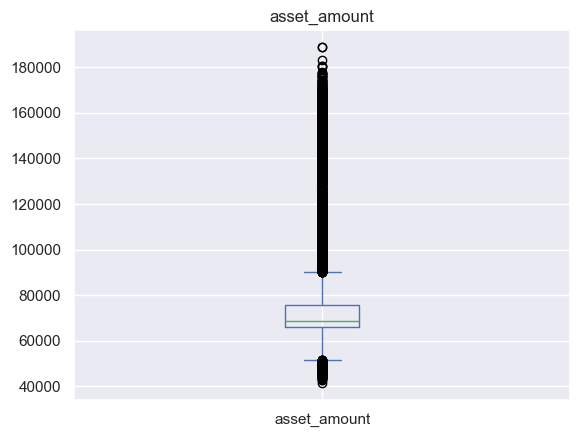

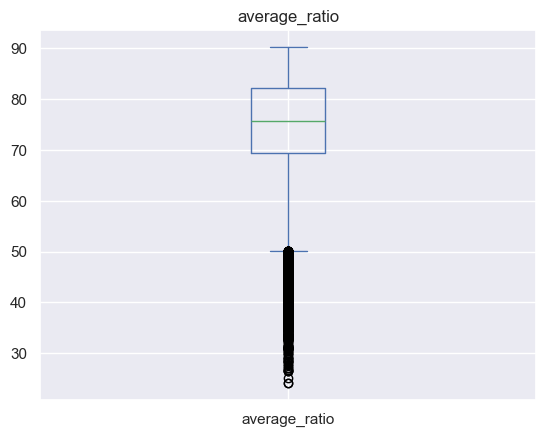

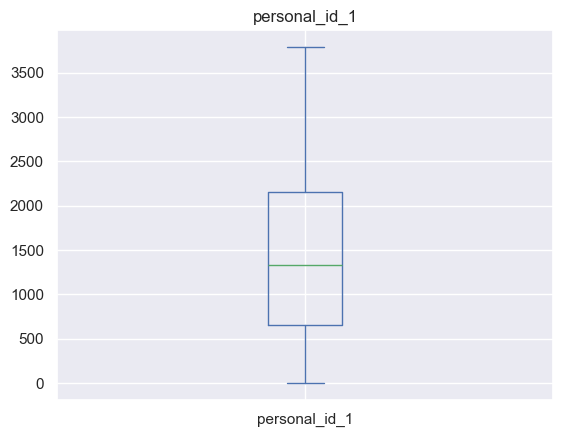

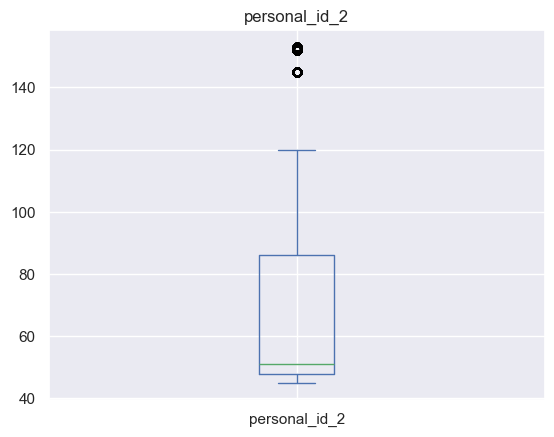

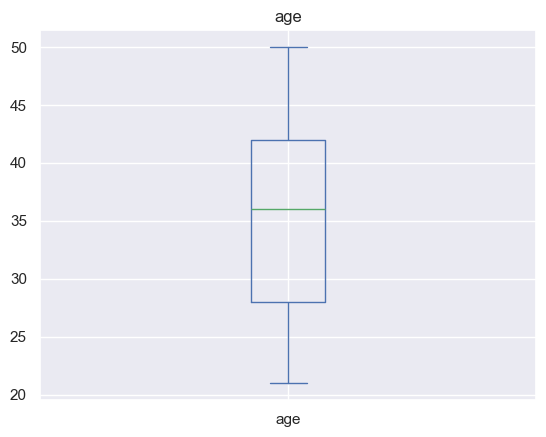

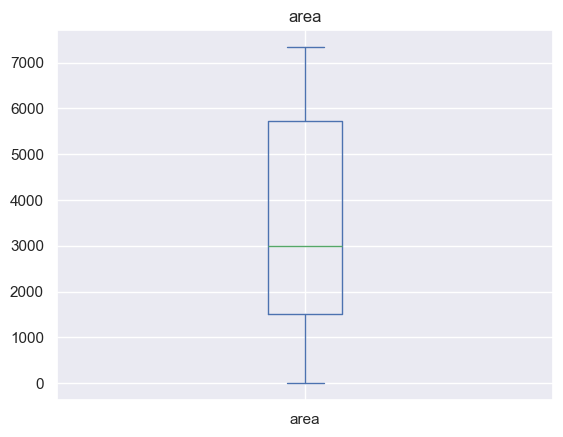

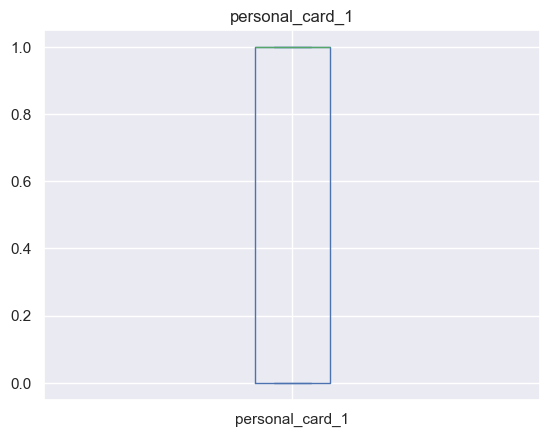

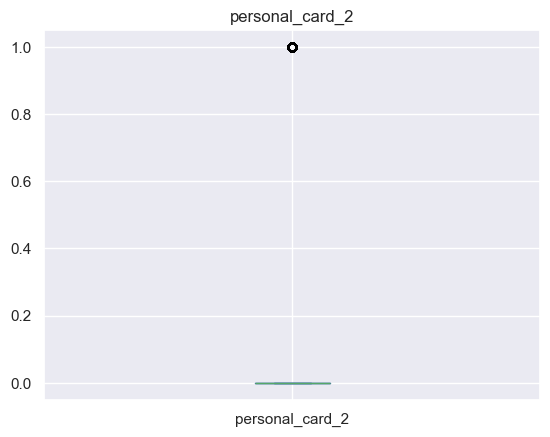

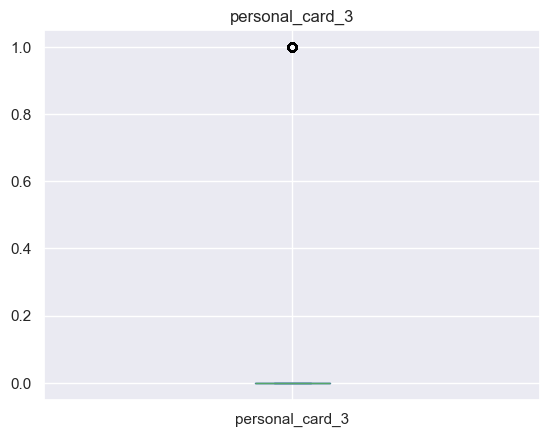

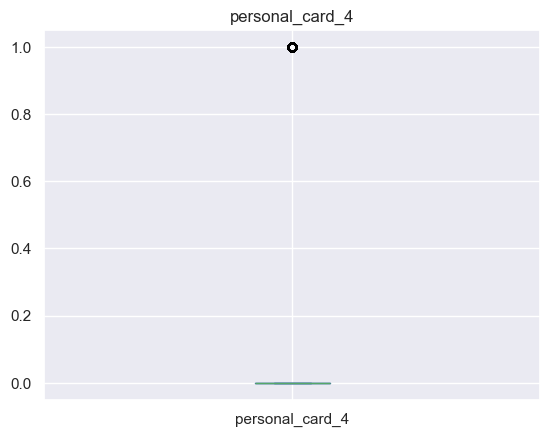

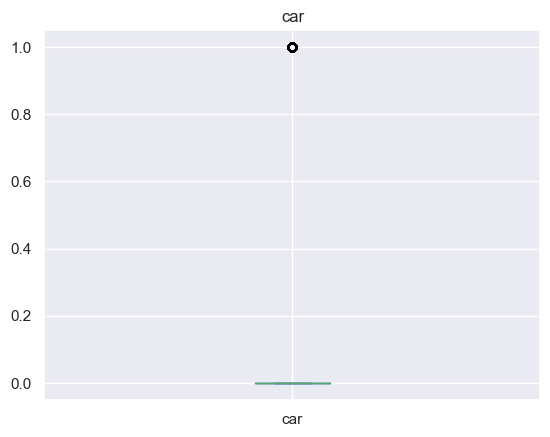

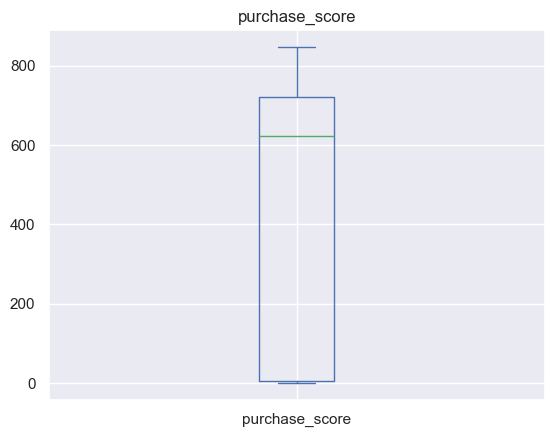

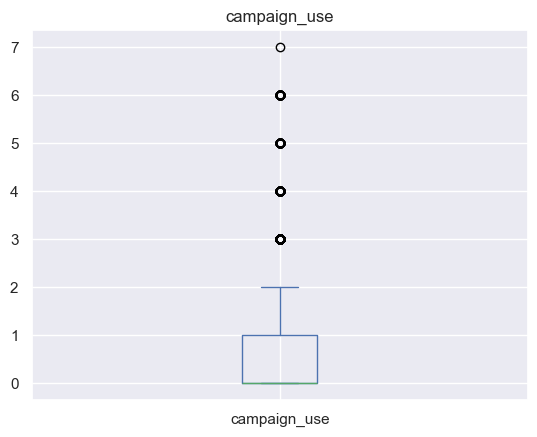

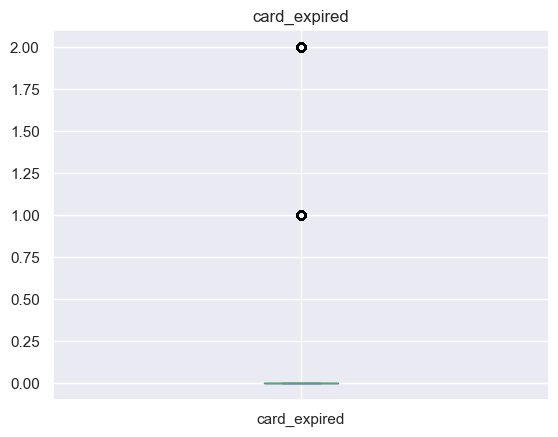

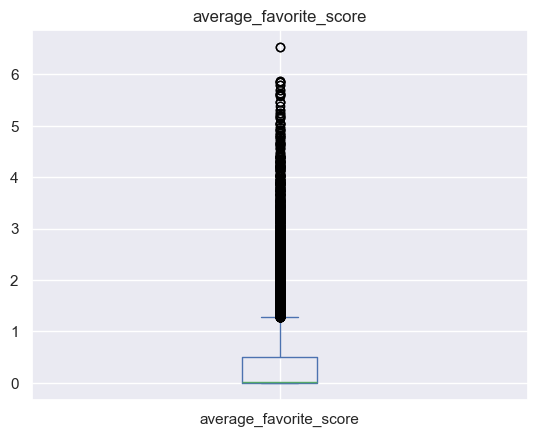

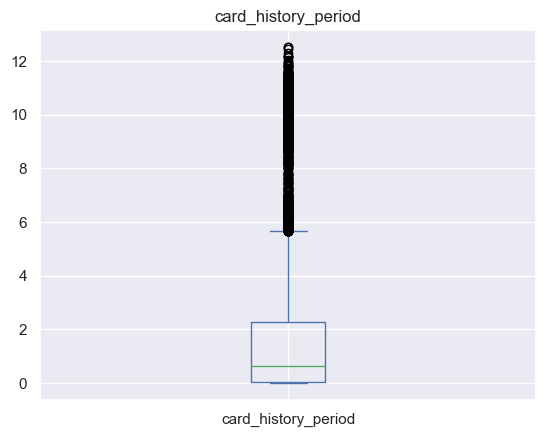

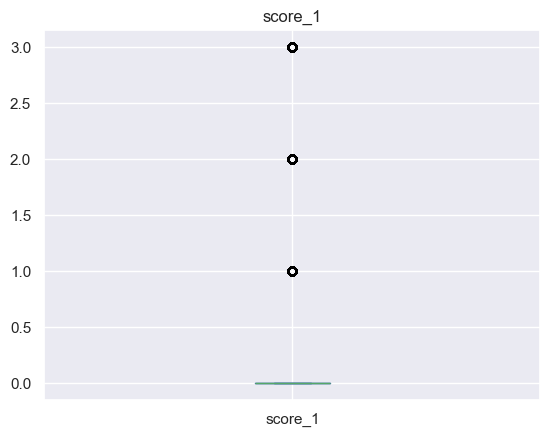

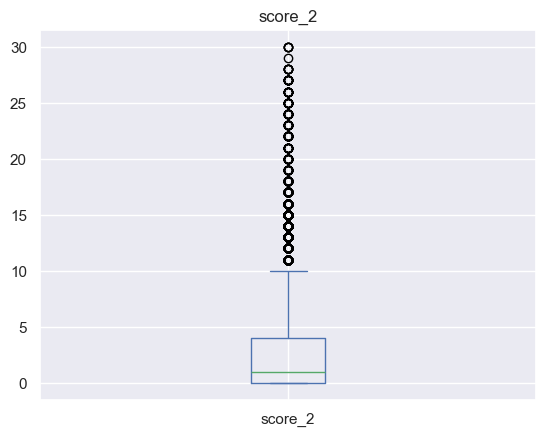

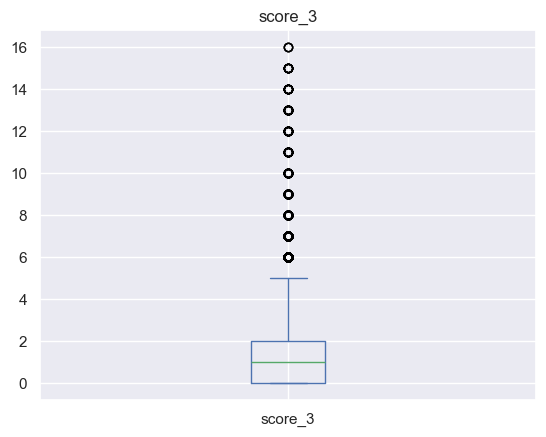

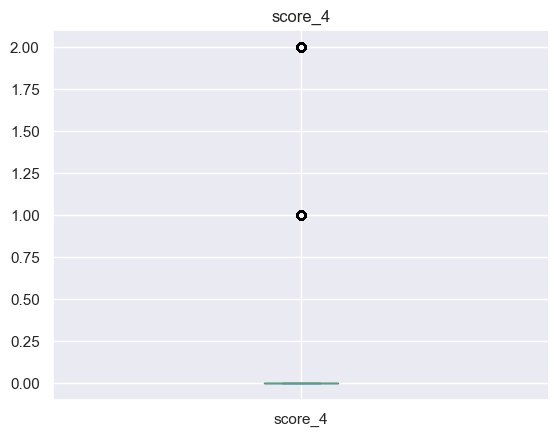

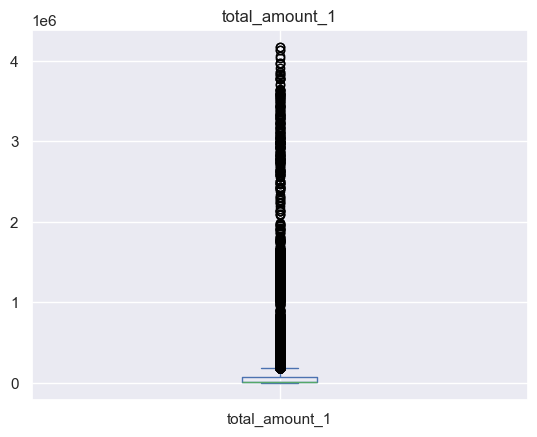

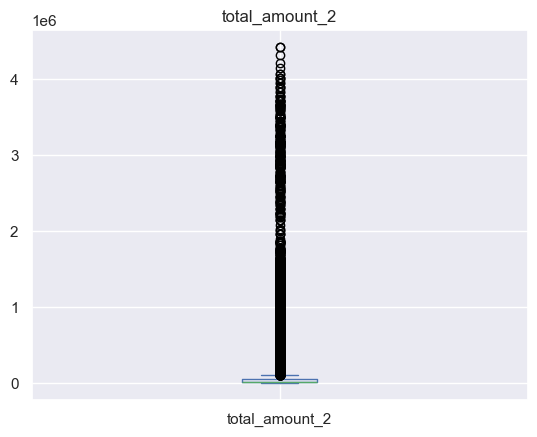

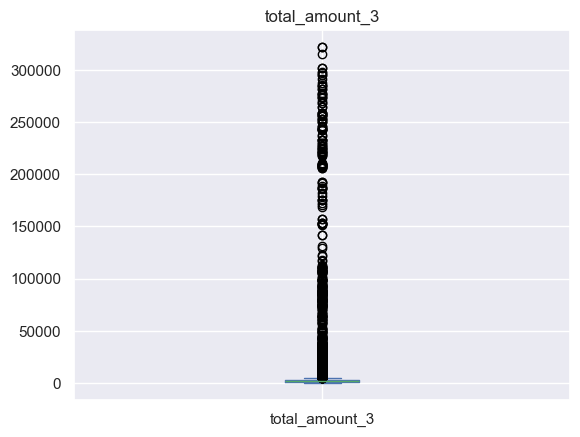

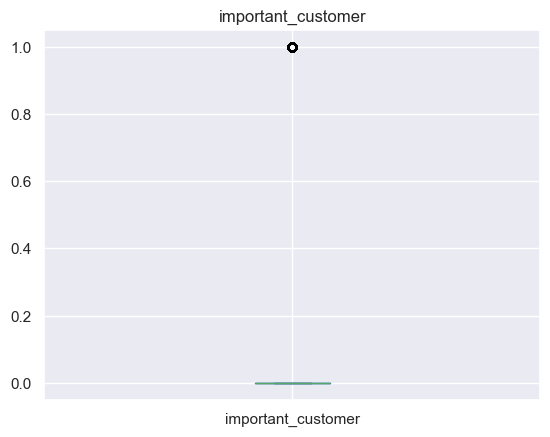

In [19]:
for i in df_num:
    plt.title(i)
    df[i].plot(kind='box')
    plt.show()

In [20]:
cols_with_outliers = ['purchase_amount', 'asset_amount', 'average_ratio', 'personal_id_2', 'average_favorite_Score',
                      'card_history_period', 'total_amount_1', 'total_amount_2', 'total_amount_3']

In [21]:
df['total_amount_1'].describe()

count    1.750000e+04
mean     1.469488e+05
std      4.320491e+05
min      3.000000e+00
25%      4.534250e+03
50%      9.294000e+03
75%      7.413000e+04
max      4.171417e+06
Name: total_amount_1, dtype: float64

<Axes: ylabel='Density'>

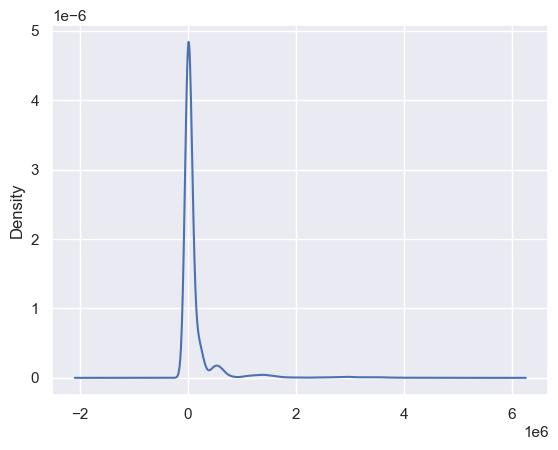

In [22]:
df['total_amount_1'].plot(kind='kde')